In [1]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pyhrv
import neurokit2 as nk
import scipy
import biosppy

import warnings
warnings.filterwarnings("ignore")

In [2]:
import hrv_functions

pyhrv version : 0.4.1
biosppy version : 2.1.2
nk version : 0.2.7


In [3]:
ecg_data = pd.read_csv('ecg_70.txt', sep = ' ')

In [4]:
print('total duration :', len(ecg_data) / 1000, 'sec')

total duration : 240.0 sec


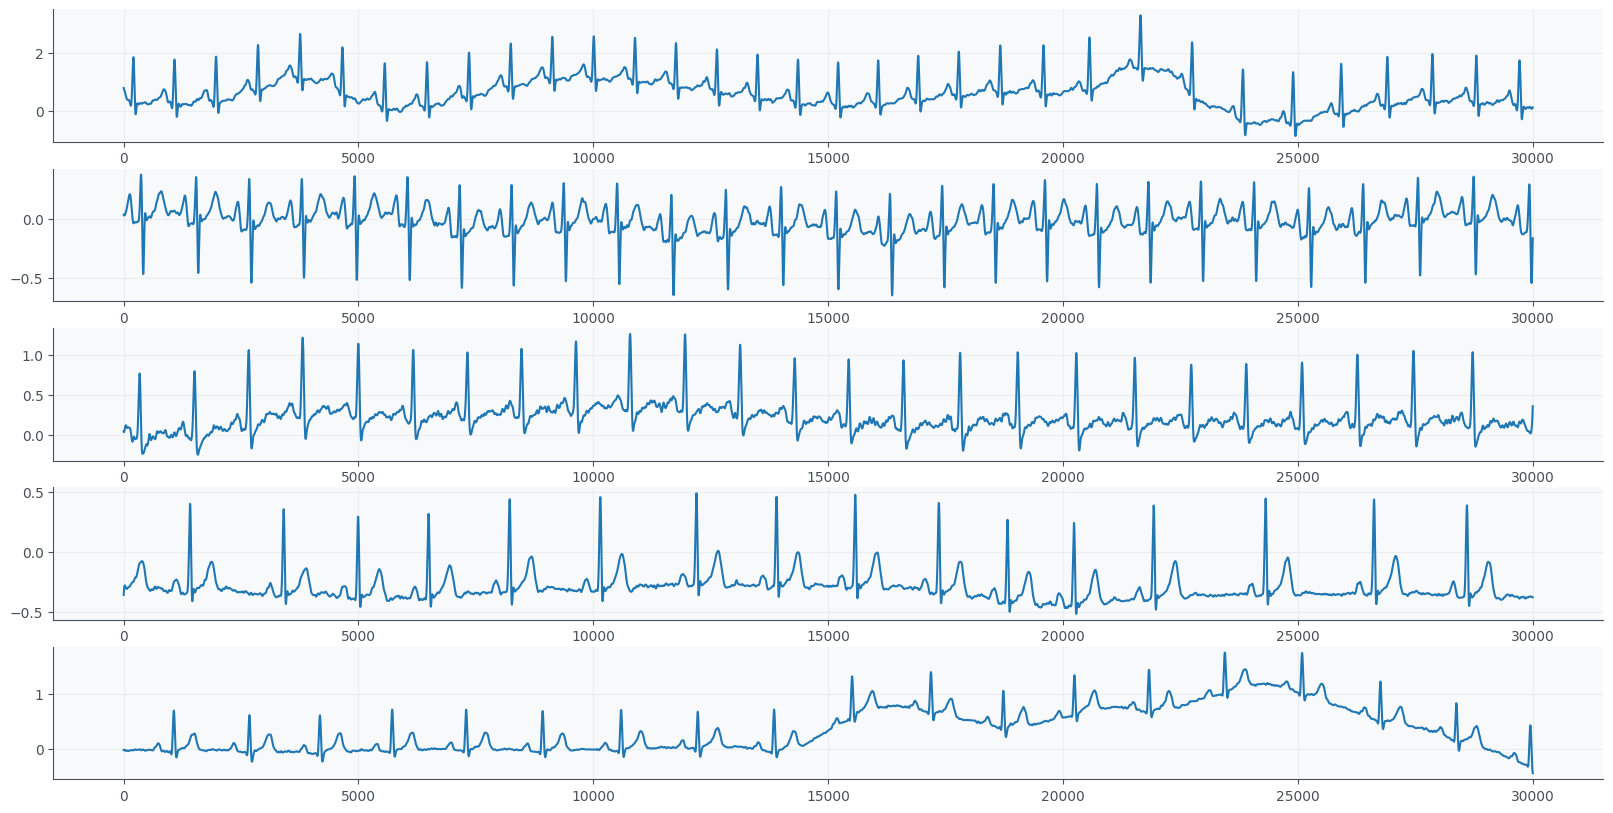

In [5]:
# sample plot
# 30 sec

plt.figure(figsize = (20, 10))

for i in range(5):
    plt.subplot(5, 1, i + 1)
    plt.plot(ecg_data[f'id{i+1}'][0:30*1000])

In [7]:
test_ecg = ecg_data['id3']

## R-peaks detection with BioSSy and Neurokit2

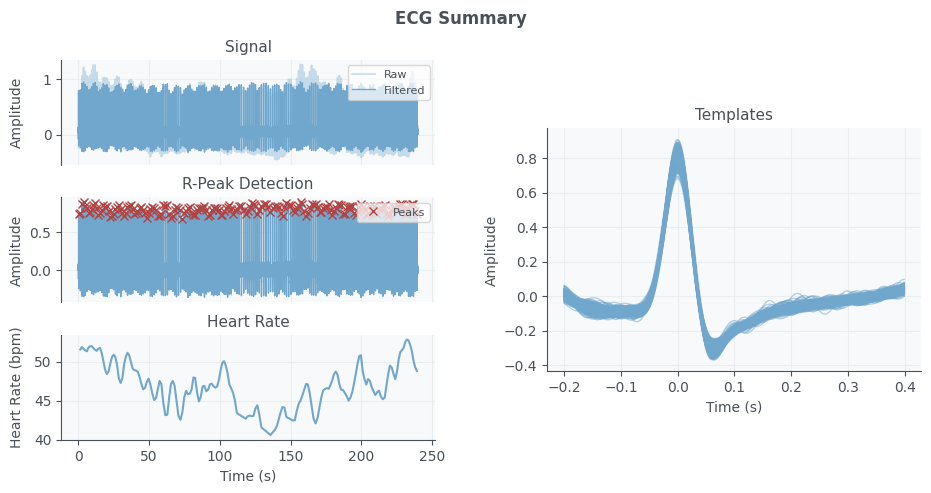

In [8]:
rpeaks, filtered = hrv_functions.peak_detection(test_ecg, peak_method = 'biosppy', sampling_rate = 1000, show = True, with_filtered = True)

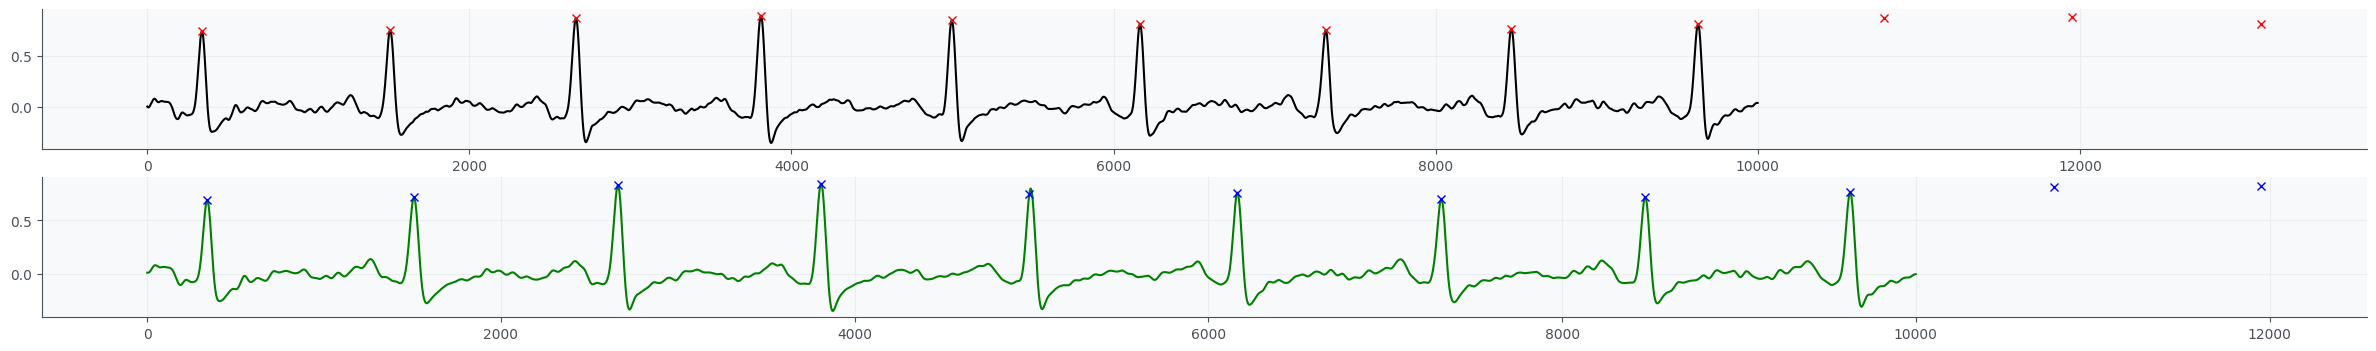

In [9]:
plt.figure(figsize = (30, 4))

plt.subplot(2, 1, 1)
rpeaks, filtered = hrv_functions.peak_detection(test_ecg, peak_method = 'biosppy', sampling_rate = 1000, show = False, with_filtered = True)
plt.plot(filtered[:10*1000], color = 'black')
for rpeak in rpeaks[:12]:
    plt.plot(rpeak, filtered[rpeak], 'x', color = 'red')
    

plt.subplot(2, 1, 2)
rpeaks, filtered = hrv_functions.peak_detection(test_ecg, peak_method = 'nk', sampling_rate = 1000, show = False, with_filtered = True)
plt.plot(filtered[:10*1000], color = 'green')

for rpeak in rpeaks[:11]:
    plt.plot(rpeak, filtered[rpeak], 'x', color = 'blue')
    


## Time Domain - pyHRV, neurokit2

In [10]:
hrv_functions.time_domain(test_ecg, peak_method = 'biosppy', method = 'nk', sampling_rate = 1000)



{'sdnn': 104.80477850804256,
 'rmssd': 49.42225999090587,
 'pnn50': 24.324324324324326}

## Frequency Domain - pyHRV, neurokit2

In [11]:
hrv_functions.frequency_domain(test_ecg, peak_method = 'biosppy', method = 'nk', sampling_rate = 1000)


{'welch': 12.089151571860748,
 'fft': 9.854923016835611,
 'lombscargle': 9.4759409897086}

## Non linear - pyHRV, neurokit2

In [12]:
hrv_functions.non_linear(test_ecg, 'nk', 'nk', 1000)

{'sd1_sd2': 0.5748270728342756}